# header

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

## Load data

In [268]:
df = pd.read_csv("clean_data.csv")

In [ ]:
# DELETE
df.columns

## Baseline Properties & Count Questions

### Determine the following basic details about the data. (Presented as a table would be ideal, but not required):

What is the “Year” range (max, min) of the data collected?

In [ ]:
min_year = df['Year'].min()
max_year = df['Year'].max()
min_year, max_year

Are there any missing years in the data? If so, which?

In [ ]:
if list(df['Year'].unique()) == list(range(min_year, max_year+1)):
    print("There are no missing Years between min and max year.")


What are the “Locations” (values) in the data?

In [ ]:
list(df['Location'].unique())

What are the “Crop Types” (values) in the data?

In [ ]:
list(df['Crop Type'].unique())

What is the range (min, max) of the temperature values?

In [ ]:
min_tmp = df['Avg Min Temp *C'].min()
max_tmp = df['Avg Min Temp *C'].max()
f"{min_tmp}\u00b0C - {max_tmp}\u00b0C"

What is the range (min, max) of the rainfall values?

In [ ]:
min_rain = df['Yr Rain mm'].min()
max_rain = df['Yr Rain mm'].max()
f"{min_rain} mm -  {max_rain} mm"

### Have all locations been used every year of data collection?

In [ ]:
# counts = df[['Year', 'Location']].groupby(['Year', 'Location']).nunique()
from itertools import product
all_possible_comb = list(product(df['Year'].unique(), df['Location'].unique()))
all_existing_comb = list(zip(df['Year'], df['Location']))
all_missing__comb = [c for c in all_possible_comb if c not in all_existing_comb]
if all_missing__comb == []:
    print("Yes, all locations been used every year of data collection.")

### Do locations always have the same “Irrigated” value or does it change over the years?

In [ ]:
location_irrigation = df.groupby(['Location'])['Irrigation'].nunique()
no_change = True
for i in location_irrigation:
    if i != 1:
        no_change = False
if no_change:
    print("Locations do always have the same 'Irrigated' value and it is not changing over the year.")

###  What is the total number of valid data entries (rows of data) you are expecting based on years of data collected and number of site locations?
Is this the number you actually have? If not, why?

In [ ]:
# getting all the possible valid data entries based on year and location
all_possible_comb = list(product(df['Year'].unique(), df['Location'].unique()))
# getting existing entries based on year and location
all_existing_comb = list(zip(df['Year'], df['Location']))

print(f"Total number of valid data entries (rows of data) expected based on years of data collected and number of site locations are: {len(all_possible_comb)}")
# if all_possible_comb and all_missing__comb are same then we do have all the valid data entries we were expecting
if all_possible_comb.sort() == all_missing__comb.sort():
    print("Yes, that is same as actual number we have in data.")

### Explore the “Crop” data:
* What is the total occurrence (count used) of each crop type in the sample? (Table?)

In [ ]:
count = pd.DataFrame(df.groupby('Crop Type')['Crop Type'].count().rename('count'))
count.reset_index()

* What is the break-down (count used) of “crop type” at each location? (Plot? Table?)

In [ ]:
count = pd.DataFrame(df.groupby(['Location','Crop Type'])['Crop Type'].count().rename('Count'))
count = count.reset_index()
count

* What is the total yield for each crop type over the entire sample? (Yield total by type?)

In [ ]:
tmp = pd.DataFrame(df.groupby('Crop Type')['Yield'].sum()).reset_index()
plot1 = tmp.plot(kind='bar', x="Crop Type", ylabel="Yield",grid=True)
for p in plot1.patches:
    h,w = p.get_height(),p.get_width()
    x,y = p.get_x(), p.get_y()
    plot1.text(x+w/2, y+h+0.1, h, ha='center', va='bottom')
plot1

* Has there been any changes in crop type usage over time? (Trends? Uniform? Plot?)

In [ ]:
"SKIP FOR NOW"

### Staff members making obversions
* Who was the longest serving staff member(s) making observations?
    * How many years and at what location?

In [ ]:
longest_serving_staff_member = df['Observer'].value_counts().index[0]
number_of_years = df['Observer'].value_counts()[longest_serving_staff_member]
location = df[df['Observer'] == longest_serving_staff_member]['Location'].values[0]
print(f"Longest serving staff member(s) making observations is {longest_serving_staff_member}, serving {number_of_years} years at location {location}")

* Did any staff member join again after they first performed the role?

In [ ]:
for Observer in df['Observer'].unique():
    # df[df['Observer'].shift()!=df['Observer']]
    years = list(df[df['Observer'] == Observer]['Year'])
    years.sort()
    full_range = list(range(min(years), max(years)+1))
    rejoin = False
    if not years == full_range:
        rejoin = True
        print(Observer)
if not rejoin:
    print("There exist no staff member who join again after they first performed the role.")
    

### Is there a relationship between temperature and yield? (Consider “in general” is acceptable.)
* Is there a different between the irrigated and non-irrigated crops?
* Note: The assumption is “yes there would be – not too cold and not too hot” and that “irrigated” locations 
would do better than non-irrigated locations.
* Tip: A plot of the yield (y-axis) compared to the temperature (x-axis) is a good start.

Table 1


Empty DataFrame
Columns: []
Index: [(N, Canola, Lake Eric), (N, Oats, Lake Eric), (N, Wheat, Lake Eric), (Y, Canola, Jesushaven), (Y, Canola, South Janethaven), (Y, Oats, Jesushaven), (Y, Oats, South Janethaven), (Y, Wheat, Jesushaven), (Y, Wheat, South Janethaven)]

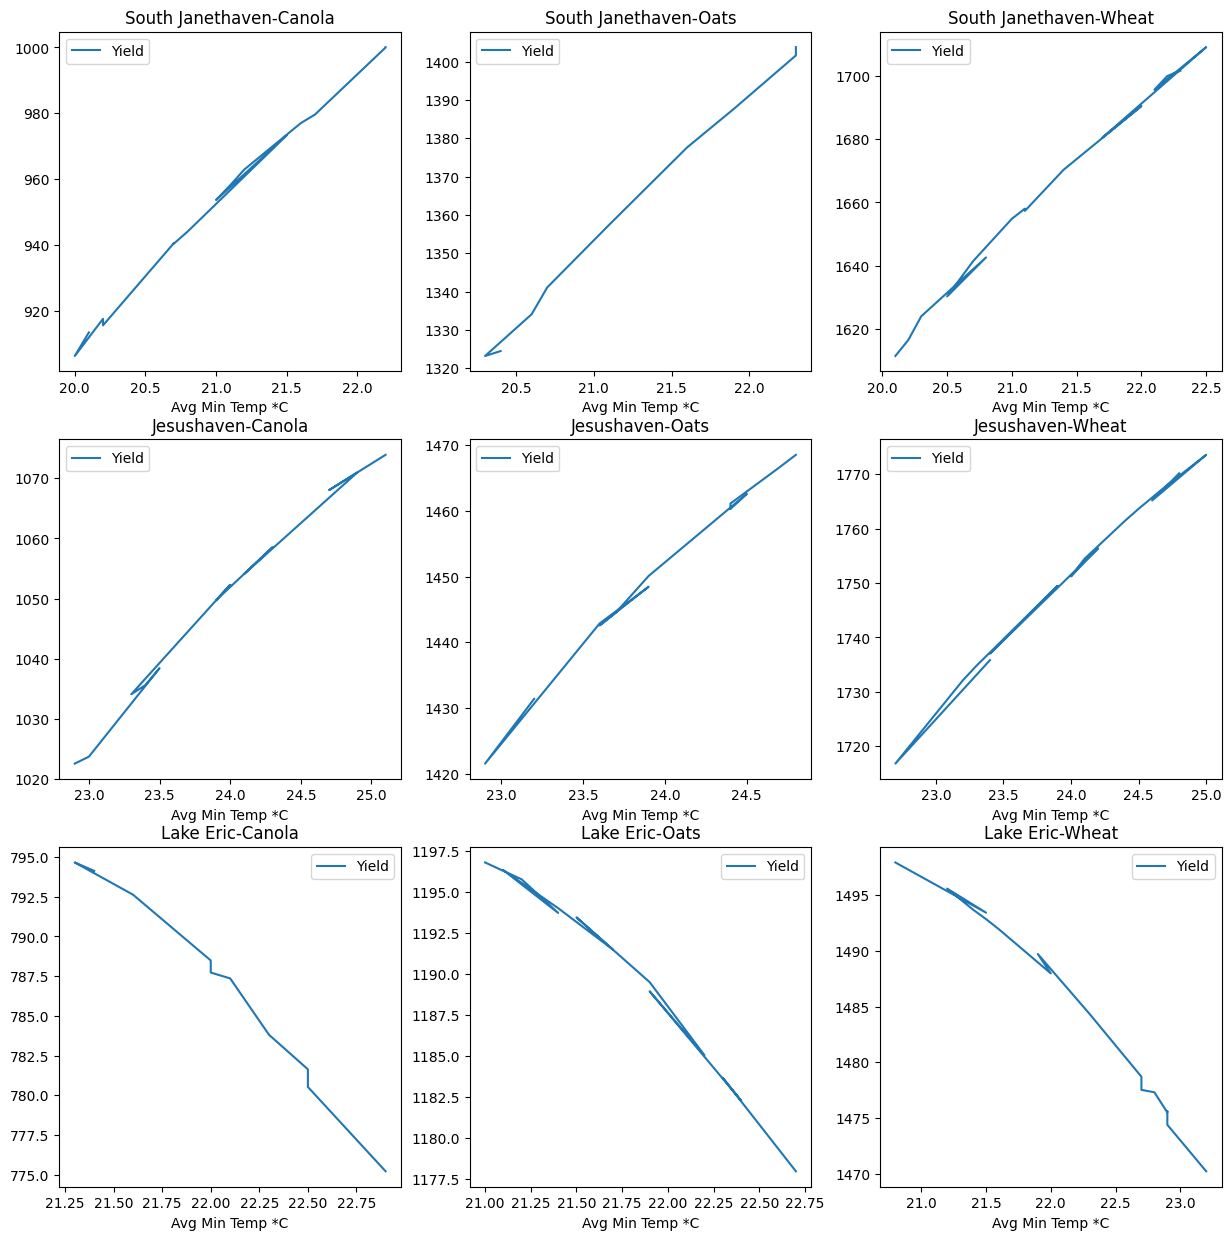

In [85]:
locations = list(df["Location"].unique())
crop_types = list(df["Crop Type"].unique())
fig, axes = plt.subplots(len(locations), len(crop_types), figsize=(15,15))
c = 0 
for r, location in enumerate(locations):
    for j, crop in enumerate(crop_types):
        df1 = df[(df['Crop Type']==crop)&(df['Location']==location)]
        df1.plot(
            title=f"{location}-{crop}",
            x="Avg Min Temp *C",
            y="Yield",
            ax=axes[r,j]
        )
        c+=1
print("Table 1")
df[['Irrigation', 'Crop Type', 'Location']].groupby(['Irrigation', 'Crop Type', 'Location']).count()

A: Temperature and yield have a linear relationship for all the crops and locations, but the direction of the relationship depends on whether the land is irrigated or not. Table 1 shows that only Lake Eric has non-irrigated crops, while the other two locations have irrigated crops.

The line-graphs of the first two locations show that irrigated crops have higher yields at higher temperatures, while the opposite is true for non-irrigated crops at Lake Eric.

Graph also shows that lowest yield for irrigated crops are still higher then highest of non-irrigated.

### Is there a relationship between rainfall and yield? (Consider “in general” is acceptable.)
* Is there a different between the irrigated and non-irrigated crops?
* Note: The assumption is “yes there would be – not too wet and not too dry” and that “irrigated” are not as 
affected by the rainfall as non-irrigated location would be.
* Tip: A plot of the yield (y-axis) compared to the rainfall (x-axis) is a good start.

Table 1


Empty DataFrame
Columns: []
Index: [(N, Canola, Lake Eric), (N, Oats, Lake Eric), (N, Wheat, Lake Eric), (Y, Canola, Jesushaven), (Y, Canola, South Janethaven), (Y, Oats, Jesushaven), (Y, Oats, South Janethaven), (Y, Wheat, Jesushaven), (Y, Wheat, South Janethaven)]

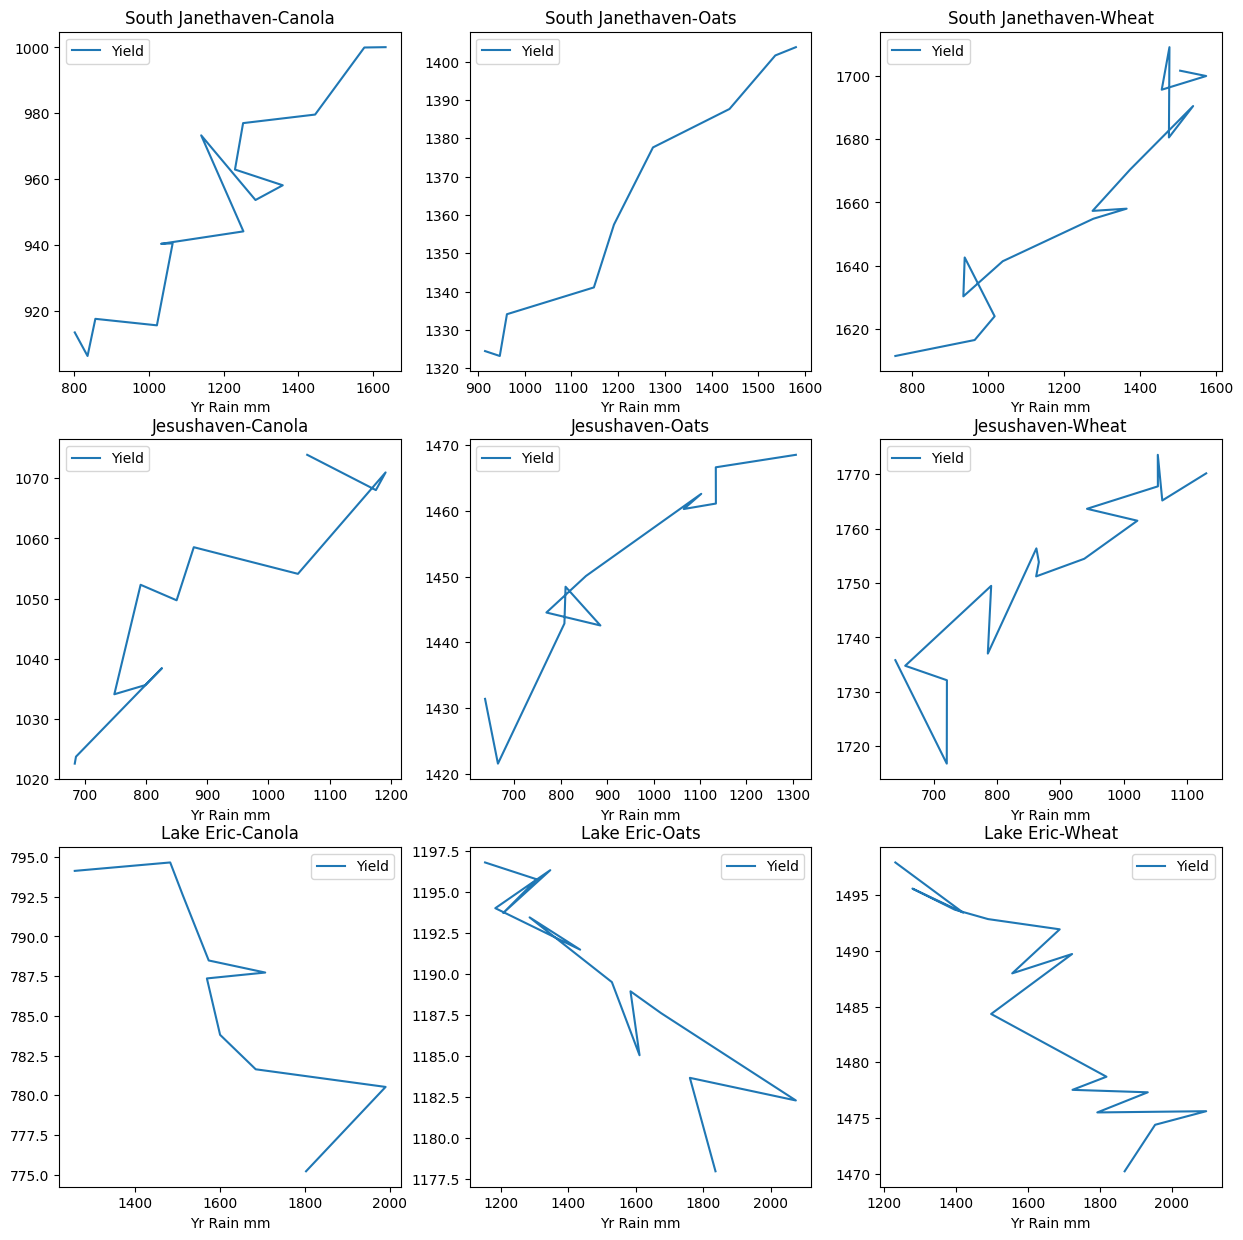

In [84]:
locations = list(df["Location"].unique())
crop_types = list(df["Crop Type"].unique())
fig, axes = plt.subplots(len(locations), len(crop_types), figsize=(15,15))
c = 0 
for r, location in enumerate(locations):
    for j, crop in enumerate(crop_types):
        df1 = df[(df['Crop Type']==crop)&(df['Location']==location)]
        df1.plot(
            title=f"{location}-{crop}",
            x="Yr Rain mm",
            y="Yield",
            ax=axes[r,j]
        )
        c+=1
print("Table 1")
df[['Irrigation', 'Crop Type', 'Location']].groupby(['Irrigation', 'Crop Type', 'Location']).count()

A: Yes there is relation between rainfall and yield. It is not as linear as relation between temperature and yield as from previous question but, it still shows general trend with amount of rain. Similar to temperature, direction of the relationship depends on whether the land is irrigated or not. Table 1 shows that only Lake Eric has non-irrigated crops, while the other two locations have irrigated crops.

The line-graphs of the first two locations show that irrigated crops have higher yields at higher rain, while the opposite is true for non-irrigated crops at Lake Eric. (relation is not perfect linear and is chaotic but is still following geneal trend.)

Graph also shows that lowest yield for irrigated crops are still higher then highest of non-irrigated.

### Is there a difference in yield expectations for specific crop types? 
* Compare both the general outcomes as well as the relationship at specific locations.
* Note: The assumption is this should be a clear “yes” – different plant types produce very different quantities of 
their unique product, but the data should show this
* Tip: Try a scatter plot (x=year, y=yield), with coloured labels for each crop type.

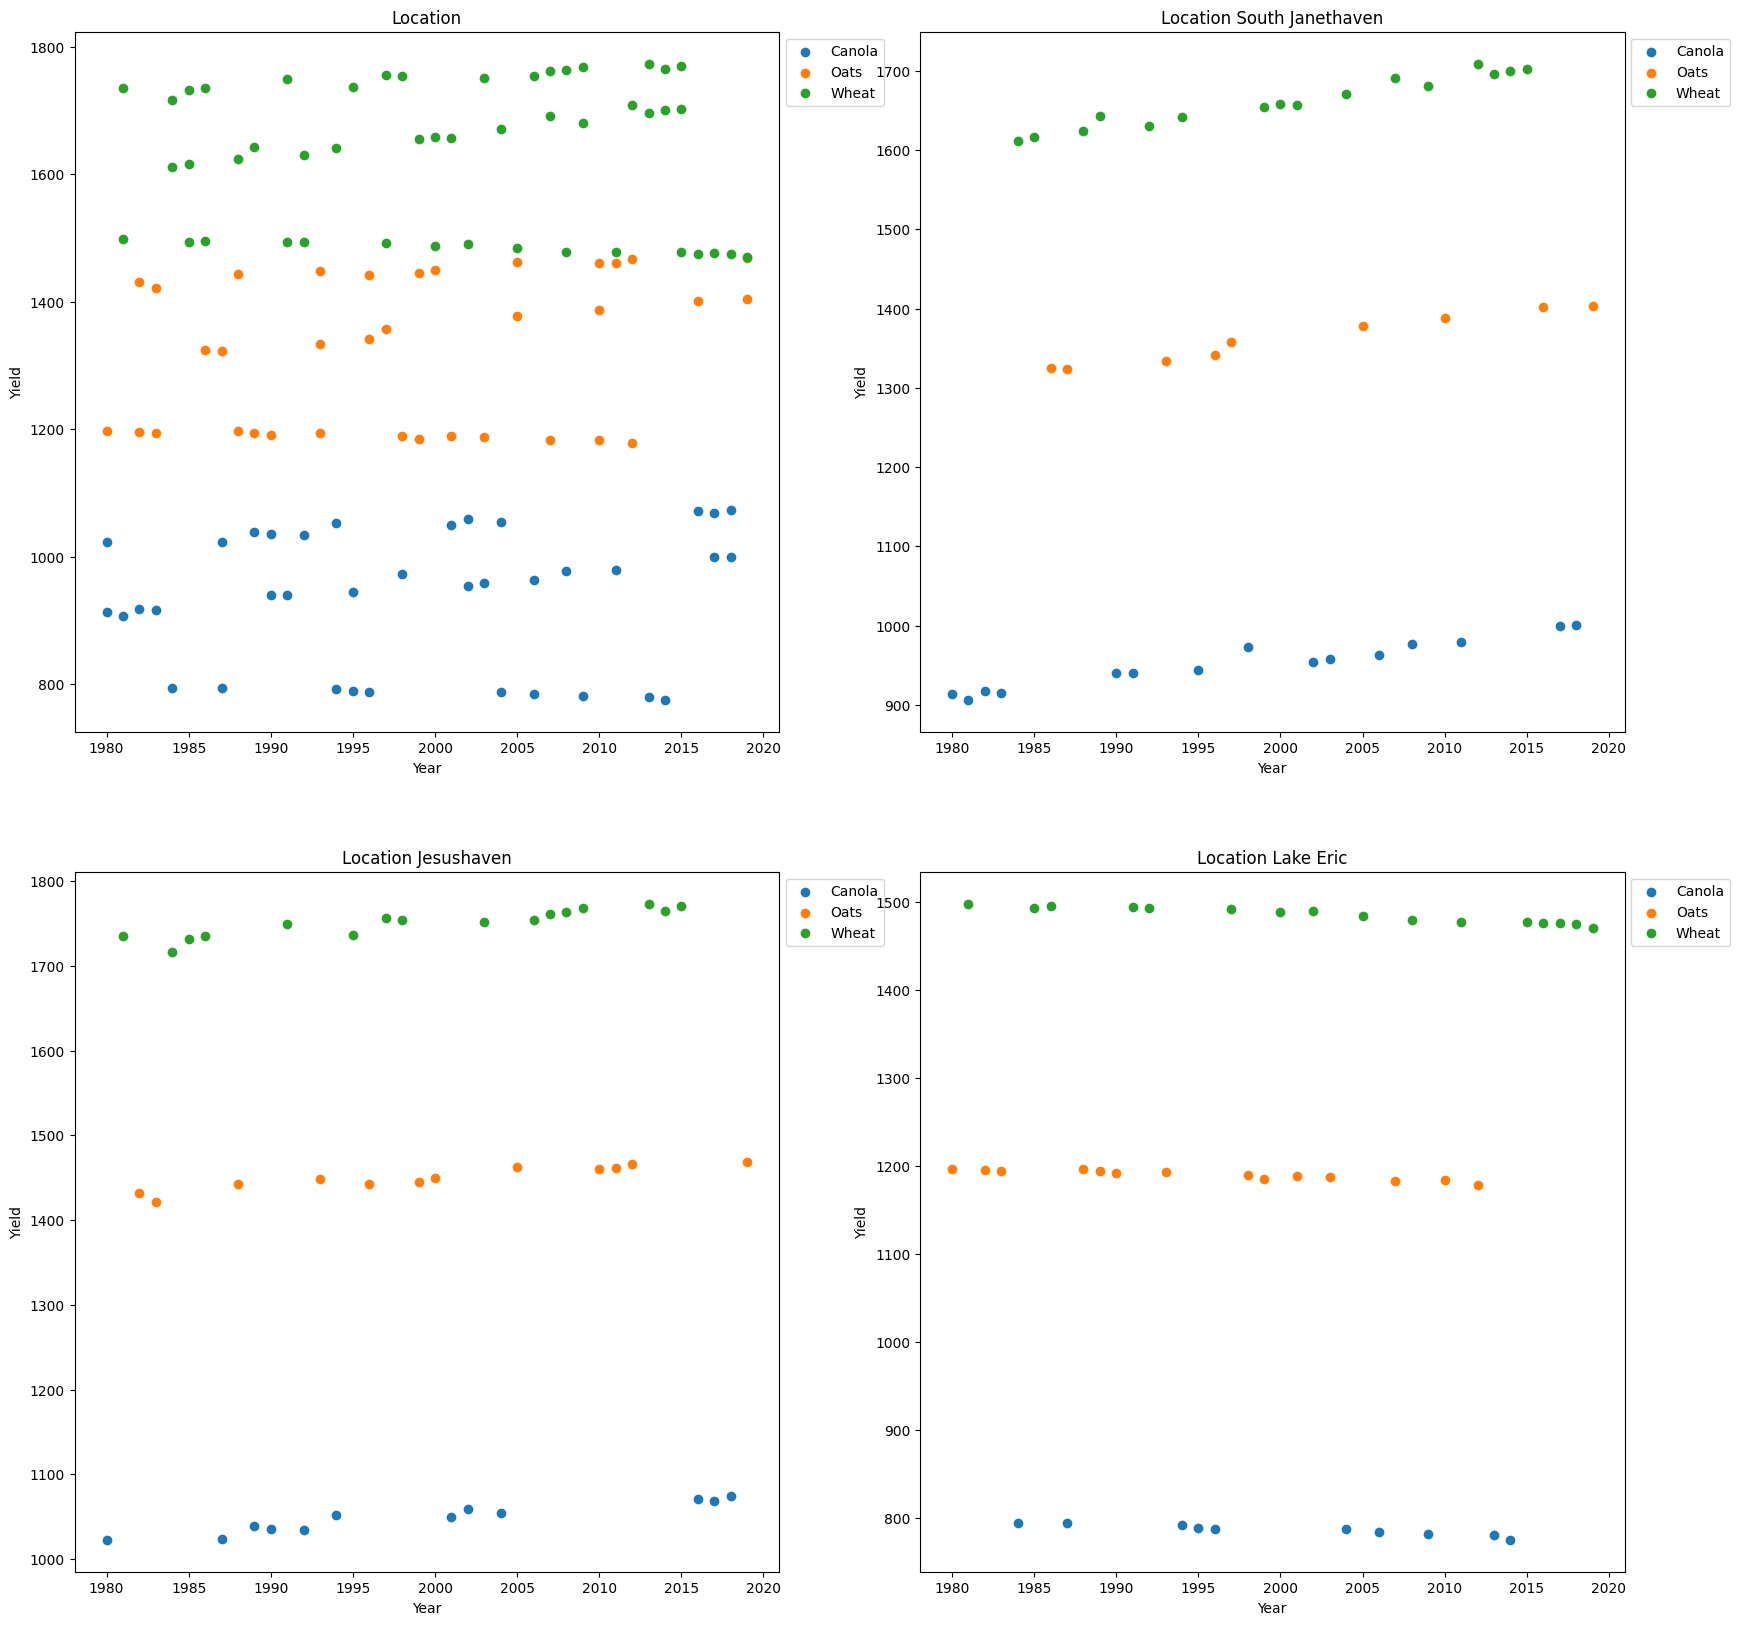

In [131]:
# to define subplots for each location
fig, axs = plt.subplots(2, 2,figsize=(20,20))

# first subplot for general data (combined for each location)
j,k = 0,0

# plotting each crop's yield against year.
for crop in list(df['Crop Type'].unique()):
    df_crop = df[df['Crop Type'] ==  crop]
    axs[j,k].scatter(df_crop['Year'], df_crop['Yield'], label=crop)
    axs[j,k].set_title(f"Location")
    axs[j,k].set_xlabel('Year')
    axs[j,k].set_ylabel('Yield')
    axs[j,k].legend(bbox_to_anchor=(1,1), loc='upper left')

# plotting other 3 subplots, 1 for each location containing data for each crop type.
for i, loc in enumerate(list(df['Location'].unique())):
    df_loc = df[df['Location']==loc]
    for crop in list(df['Crop Type'].unique()):
        df_crop = df_loc[df_loc['Crop Type'] ==  crop]

        # defining subplot location based on "Location" index
        if i==0: j,k = 0,1
        elif i==1: j,k = 1,0
        elif i==2: j,k = 1,1

        # draw the plot
        axs[j,k].scatter(df_crop['Year'], df_crop['Yield'], label=crop)
        axs[j,k].set_title(f"Location {loc}")
        axs[j,k].set_xlabel('Year')
        axs[j,k].set_ylabel('Yield')
        axs[j,k].legend(bbox_to_anchor=(1,1), loc='upper left')
plt.show()

A: Yes, there is a difference in yield expectations for specific crop types. From the first scatter plot, we can see that the yield from each crop is clearly separated into three bands. The yield from wheat is the highest, and the yield from canola is the lowest, with oats being in the middle. This pattern is also followed for each of the three locations, as seen in the other three scatter plots. However, the absolute yield for each crop differs from location to location due to other factors such as irrigation.

###  Is there a difference in yield trends (over time) at different locations?

In [177]:
for loc in df['Location'].unique():
    for crop in df['Crop Type'].unique():
        df1 = df[(df['Location']==loc)&(df['Crop Type']==crop)][['Year','Yield']]
        df1.sort_values(by='Yield')
        # print(f"For crop {crop} at location {loc} min yield is {df1.iloc[0]['Yield']} from year {int(df1.iloc[0]['Year'])} and max yield is {df1.iloc[-1]['Yield']} from year {int(df1.iloc[-1]['Year'])}")
        print(f"For crop {crop} at location {loc} min yield is {df1.iloc[0]['Yield']} from year {int(df1.iloc[0]['Year'])} and max yield is {df1.iloc[-1]['Yield']} from year {int(df1.iloc[-1]['Year'])}")

For crop Canola at location South Janethaven min yield is 913.34 from year 1980 and max yield is 1000.1 from year 2018
For crop Oats at location South Janethaven min yield is 1324.48 from year 1986 and max yield is 1403.78 from year 2019
For crop Wheat at location South Janethaven min yield is 1611.36 from year 1984 and max yield is 1701.71 from year 2015
For crop Canola at location Jesushaven min yield is 1022.55 from year 1980 and max yield is 1073.92 from year 2018
For crop Oats at location Jesushaven min yield is 1431.4 from year 1982 and max yield is 1468.55 from year 2019
For crop Wheat at location Jesushaven min yield is 1735.82 from year 1981 and max yield is 1770.18 from year 2015
For crop Canola at location Lake Eric min yield is 794.13 from year 1984 and max yield is 775.22 from year 2014
For crop Oats at location Lake Eric min yield is 1196.8 from year 1980 and max yield is 1177.96 from year 2012
For crop Wheat at location Lake Eric min yield is 1497.96 from year 1981 and m

A: The trends for the three locations are as follows: 

- South Janethaven: The yield for all three crops has been increasing over the years.
- Jasushaven: The yield for all three crops has remained mostly steady with only a nominal increase over time.
- Lake Eric: The yield for all three crops has been decreasing consistently over the years.

This information can also be seen in the scatter plots above. Additionally, the answer to this question can be found in the charts as well as the min-max data from the above cell.

### What is the location that has performed best over the entire collection time?

In [194]:
avg_yield_per_location = pd.DataFrame(df.groupby('Location')['Yield'].mean()).reset_index()
avg_yield_per_location_per_crop = pd.DataFrame(df.groupby(['Crop Type','Location'])['Yield'].mean())
display(avg_yield_per_location)
display(avg_yield_per_location_per_crop)

,Location,Yield
0,Jesushaven,1450.16625
1,Lake Eric,1206.98900
2,South Janethaven,1327.92175


Yield
Crop Type Location                     
Canola    Jesushaven        1048.503333
          Lake Eric          786.620000
          South Janethaven   952.120000
Oats      Jesushaven        1450.061667
          Lake Eric         1189.753571
          South Janethaven  1361.225556
Wheat     Jesushaven        1751.491875
          Lake Eric         1484.800625
          South Janethaven  1661.502500

A: Based on the data, the overall best performing location, considering all crops combined, is Jesushaven, with an average yield of 1450.17. This finding remains consistent even when evaluating each individual crop separately.

### What is the crop type that has performed best over the entire collection time?

In [229]:
avg_yield_per_crop = pd.DataFrame(df.groupby('Crop Type')['Yield'].mean()).reset_index()
avg_yield_per_crop

,Crop Type,Yield
0,Canola,938.649730
1,Oats,1323.094857
2,Wheat,1632.598333


A: Wheat with average of 1632.60

## Event Relationships (~2-5 marks each):

### Show appropriate plots of Dry Spell and Heat Wave events to determine:
* Which locations have had the most and least events, respectively?

In [263]:
columns_to_count = ['Heat Wave','Dry Spell']
for col in columns_to_count:
    count = pd.DataFrame(
                    df[df[col]=='Y']
                    .groupby('Location')[col]
                    .count()
                    )\
                .sort_values(by=col, ascending=False)\
                .reset_index()
    print(col+':')
    print(f"Location {list(count['Location'])[0]} had the most {col}")
    print(f"Location {list(count['Location'])[-1]} had the least {col}")
    display(count)


Heat Wave:
Location Jesushaven had the most Heat Wave
Location Lake Eric had the least Heat Wave


,Location,Heat Wave
0,Jesushaven,19
1,South Janethaven,19
2,Lake Eric,2


Dry Spell:
Location South Janethaven had the most Dry Spell
Location Jesushaven had the least Dry Spell


,Location,Dry Spell
0,South Janethaven,4
1,Lake Eric,3
2,Jesushaven,1


* Is there a relationship to temperature, rainfall, yield or year?

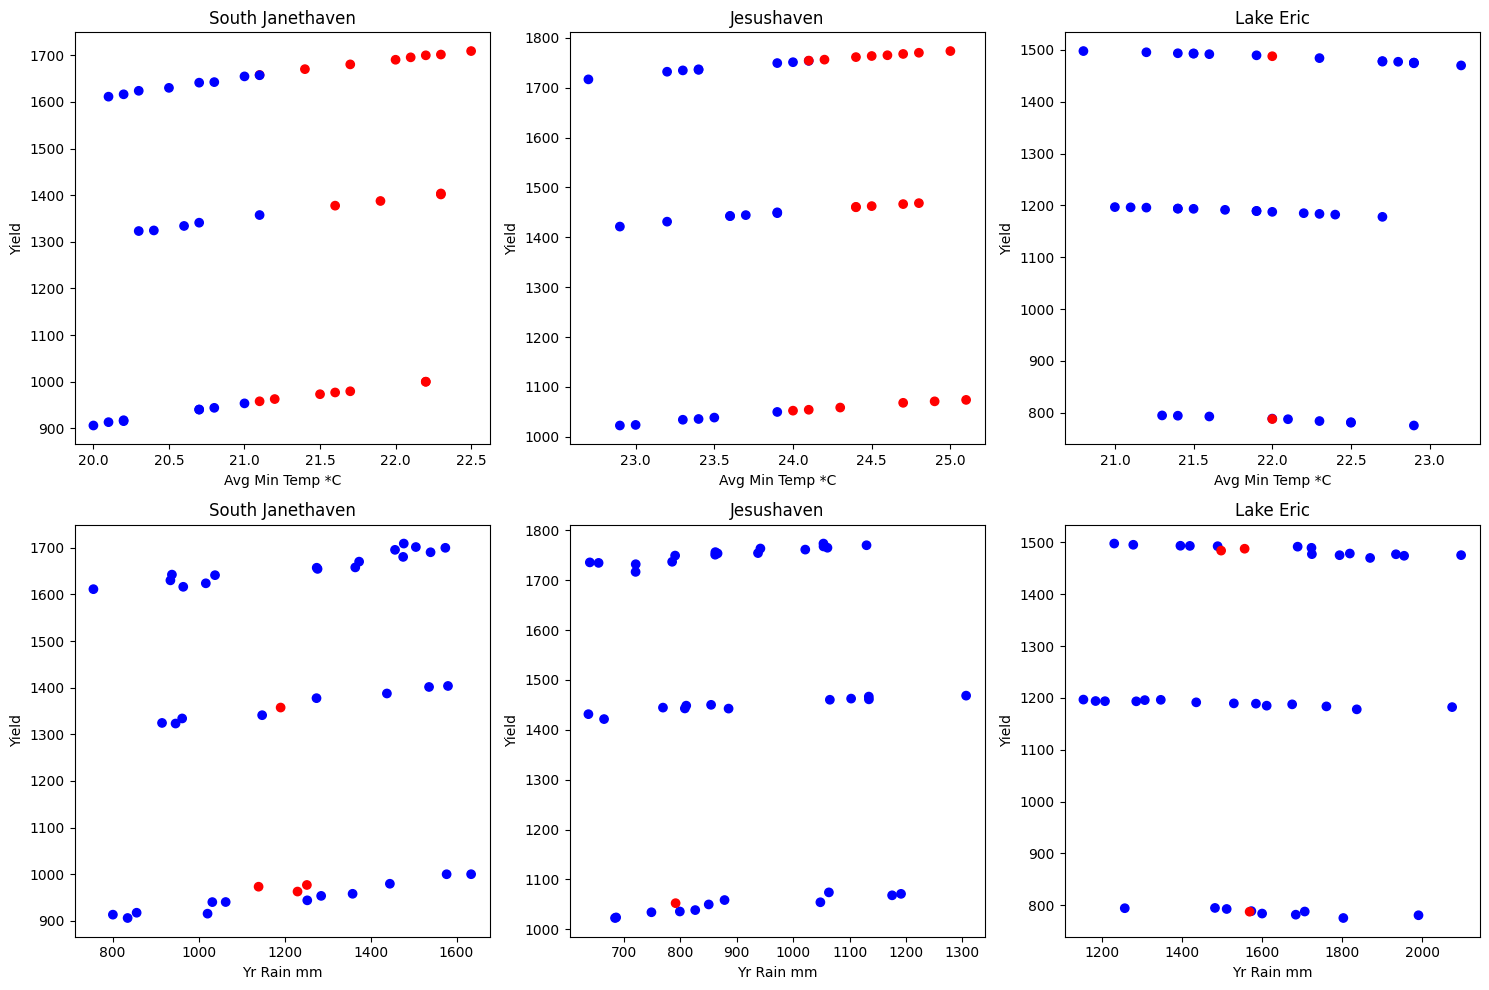

In [283]:
# Get unique locations
locations = df['Location'].unique()

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=len(locations), figsize=(15, 10))

# Iterate over locations and create scatter plots for Yield vs Temp and Heat Wave
for i, location in enumerate(locations):
    ax = axes[0,i]
    location_df = df[df['Location'] == location]
    heat_wave_colors = ['red' if hw == 'Y' else 'blue' for hw in location_df['Heat Wave']]
    ax.scatter(location_df['Avg Min Temp *C'], location_df['Yield'], c=heat_wave_colors)
    ax.set_xlabel('Avg Min Temp *C')
    ax.set_ylabel('Yield')
    ax.set_title(location)

# Iterate over locations and create scatter plots for Yield vs Yr Rain mm and Dry Spell
for i, location in enumerate(locations):
    ax = axes[1,i]
    location_df = df[df['Location'] == location]
    dry_spell_colors = ['red' if ds == 'Y' else 'blue' for ds in location_df['Dry Spell']]
    ax.scatter(location_df['Yr Rain mm'], location_df['Yield'], c=dry_spell_colors)
    ax.set_xlabel('Yr Rain mm')
    ax.set_ylabel('Yield')
    ax.set_title(location)

plt.tight_layout()
plt.show()

A: Regarding the first three plots, they illustrate the relationship between temperature, heat wave occurrence, and yield. It is evident that heat wave occurrences directly correlate with higher average temperatures. However, the data does not clearly indicate the combined effects of temperature and heat waves on yield.

Moving on to the last three plots in the second row, they demonstrate the relationship between rainfall and yield, while also indicating instances of dry spells. It is important to note that the data shows only a few occurrences of dry spells, making it challenging to draw definitive conclusions about their impact on yield. Additionally, the yield appears to remain relatively consistent despite changes in rainfall. This consistency could be attributed to the presence of irrigation methods.
